# The zero-lift angle of a finite wing

This code sets the style of the notebook.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./style/nbstyle.css', 'r').read()
    return HTML(styles)
css_styling()

Set up some Python tools first.

In [2]:
# load libraries and set plot parameters
import numpy as np
import tables as pt

from sympy import *

from IPython.display import display, Math, Latex

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

## The wing zero-lift angle

We call $\alpha_{0L}$ the zero-lift angle of a wing. If the free-stream velocity has an angle $\alpha_{\mathrm{W}}=\alpha_{0L}$ with respect to the wing root chord then the lift is zero: $C_L = 0$.

The zero-lift angle of attack is given by the following formula:

\begin{equation}
%\label{eq:AlphaZeroLift}
\alpha_{0L} 
  = \frac{2}{S} \int_0^{b/2} 
    \left[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\right]
    c(y) \, \mathrm{d}y
\end{equation}

where $y$ is the generic coordinate along the wing span, $\alpha_{0\ell}(y)$ is the zero-lift angle of attack of the local airfoil at section, $\epsilon_{\mathrm{g}}(y)$ is the local section incidence with respect to the wing root chord, and $c(y)$ is the local chord.

## Numerical example

Let us consider an example where we calculate $\alpha_{0L} $ using the Python programming language. Let us start by defining the following variables:

In [3]:
c_r = 1.0; c_t = 0.5; b = 6.5

We will assume that all quantities in our calculations are expressed in SI units.

In [4]:
display(Math(r'\text{root chord:}\quad c_{\mathrm{r}} = '+ str(c_r) +'\,\mathrm{m}'))
display(Math(r'\text{tip chord:}\quad c_{\mathrm{t}} = '+ str(c_t) +'\,\mathrm{m}'))
display(Math(r'\text{span:}\quad b = '+ str(b) +'\,\mathrm{m}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

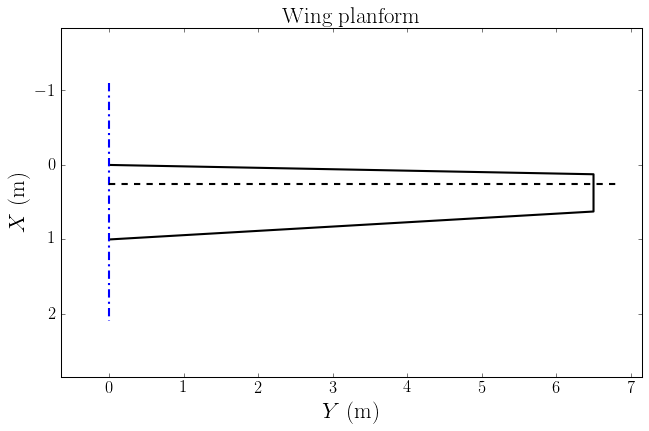

In [5]:
xLineWing = [0,b,b,0]
yLineWing = [0,0.25*c_r-0.25*c_t,0.25*c_r+0.75*c_t,c_r]

# planform
lineWing, = plt.plot(xLineWing, yLineWing, 'k-')
# centerline
centerLine, = plt.plot([0,0], [-1.1*c_r,2.1*c_r], 'b')
centerLine.set_dashes([8, 4, 2, 4]) 
# c/4 line
quarterChordLine, = plt.plot([0,1.05*b], [0.25*c_r,0.25*c_r], 'k--')

plt.axis('equal')
plt.axis([-0.1*b, 1.1*b, -0.1*c_r, 1.1*c_r])
plt.gca().invert_yaxis()
plt.title('Wing planform', fontsize=22)
plt.xlabel('$Y$ (m)', fontsize=22)
plt.ylabel('$X$ (m)', fontsize=22)
plt.show()

In [6]:
S = (c_r + c_t)*b/2
taper_ratio = c_t/c_r
AR = b*b/S
print("Taper ratio: {0}\nWing area: {1} m^2\nAspect ratio: {2}".format(taper_ratio,S,AR))

Taper ratio: 0.5
Wing area: 4.875 m^2
Aspect ratio: 8.666666666666666


The reference wing area, given by the formula
\begin{equation}
%\label{eq:WingSurface}
S=( c_{\mathrm{r}} + c_{\mathrm{t}} )\,\frac{1}{2} b
\end{equation}

becomes

In [7]:
display(Math(r'\text{surface:}\quad S = '+ str(S) +'\,\mathrm{m}^2'))

<IPython.core.display.Math object>

The taper ratio

\begin{equation}
%\label{eq:TaperRatio}
\lambda = \frac{ c_{\mathrm{t}} }{ c_{\mathrm{r}} }
\end{equation}

becomes

In [8]:
display(Math(r'\text{taper ratio:}\quad \lambda = '+ str(taper_ratio)))

<IPython.core.display.Math object>

The aspect ratio

\begin{equation}
%\label{eq:AspectRatio}
\text{AR} = \frac{ b^2 }{ S }
\end{equation}

becomes

In [9]:
display(Math(r'\text{aspect ratio:}\quad \text{AR} = '+ '{0:.4}'.format(AR)))

<IPython.core.display.Math object>

In [10]:
A_c = 2*(c_t - c_r)/b; B_c = c_r;
print("A_c: {0}\nB_c: {1} m".format(A_c,B_c))

A_c: -0.15384615384615385
B_c: 1.0 m


The law of the chords

\begin{equation}
%\label{eq:ChordsLaw}
c(y) = A_c \, y + B_c
\end{equation}

with 

\begin{equation}
%\label{eq:ChordsLawAB}
A_c = \frac{2}{b} \left( c_{\mathrm{t}} - c_{\mathrm{r}} \right)
  \;\;,\qquad 
  B_c = c_{\mathrm{r}}
\end{equation}

becomes



In [11]:
display(Math(r'c(y) =\,'
             + '{0:.3}'.format(A_c) + '\,y + ' + '{0:.3}'.format(B_c) + r'\,\text{m}'))

<IPython.core.display.Math object>

If we integrate the law $c(y)$ over the span we have again the value of $S$:

In [18]:
y = Symbol('y')
ltx_int = latex(integrate(A_c*y + B_c,y))
int_def = 2*integrate(A_c*y + B_c,(y,0,b/2))
display(Math(
        r'2\int_0^{b} c(y) \,\text{d}y =\,' 
        +r'2\int_0^{'+ str(b/2) + r'} c(y) \,\text{d}y =\,' 
        + ltx_int + r'|_0^{' + str(b/2)
        +r'=\,' + '{0:.4}'.format(S) + r'\,\text{m}^2'
    ))
print(int_def)

<IPython.core.display.Math object>

4.87500000000000


In [13]:
display(
    Math(
        r'S = 2 \int_0^{'+str(b/2)+'} \left(' 
        + str(A_c) + 'y + ' + str(B_c)
        + r'\right)\,\text{d}y =' 
        + r'2\left(' + ltx_int + r'\right)\Bigr|_0^{'+str(b/2)+'}'
        + '=' + str(S) + r'\,\text{m}^2'
    ))

<IPython.core.display.Math object>

In [14]:
Latex(
    r'\begin{equation*}'
    + r'S = 2 \int_0^{'+str(b/2)+'} \left(' 
    + str(A_c) + 'y + ' + str(B_c)
    + r'\right)\,\text{d}y =' 
    + r'2\left(' + ltx_int + r'\right)\Bigr|_0^{'+str(b/2)+'}'
    + '=' + str(S) + r'\,\text{m}^2'
    +r'\end{equation*}'
    )

<IPython.core.display.Latex object>

In [15]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%latex  %%perl  %